In [10]:
import os
import glob
import torch
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import config
import dataset
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19


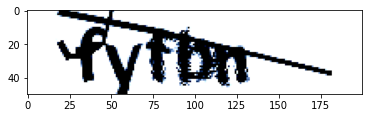

In [12]:
image_files = glob.glob(os.path.join("/home/hung/learn/pytorch/ctc/data/captcha_images_v2", "*.png"))

# Get labels
targets_orig = [x.split("/")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]

targets_flat = [c for char_arr in targets for c in char_arr]
lbl_encoder = preprocessing.LabelEncoder()
lbl_encoder.fit(targets_flat)

targets_enc = [lbl_encoder.transform(char_array) for char_array in targets]
targets_enc = np.array(targets_enc) + 1

# print(targets)
print(len(np.unique(targets_flat)))

(train_imgs, test_imgs, train_targets, test_targets, train_orig_targets, test_orig_targets) = model_selection.train_test_split(
    image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.CaptchaDataset(train_imgs, train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))

img = train_dataset[0]["images"].numpy().transpose(1,2,0)
plt.imshow(img)
plt.show()


In [17]:
img.shape

(50, 200, 3)